In [ ]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns

In [ ]:
# Loading the Dataset
df= pd.read_excel('health_dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      100 non-null    object 
 1   Age             100 non-null    int64  
 2   Gender          100 non-null    object 
 3   Height_cm       100 non-null    float64
 4   Weight_kg       100 non-null    float64
 5   Systolic_BP     100 non-null    int64  
 6   Diastolic_BP    100 non-null    int64  
 7   Smoking_Status  100 non-null    object 
 8   Diabetes        100 non-null    bool   
 9   BMI             100 non-null    float64
dtypes: bool(1), float64(3), int64(3), object(3)
memory usage: 7.3+ KB


In [26]:
df.head(10)

,Patient_ID,Age,Gender,Height_cm,Weight_kg,Systolic_BP,Diastolic_BP,Smoking_Status,Diabetes,BMI
0,P001,56,Male,140.0,46.7,107,75,Never,False,23.8
1,P002,69,Female,179.8,62.3,123,105,Current,True,19.3
2,P003,46,Female,186.6,59.0,119,84,Current,False,16.9
3,P004,32,Male,177.3,72.9,110,82,Never,False,23.2
4,P005,60,Female,162.9,61.7,136,95,Current,True,23.3
5,P006,25,Female,158.1,68.1,139,97,Former,False,27.2
6,P007,78,Other,172.3,46.6,131,105,Never,True,15.7
7,P008,38,Female,158.8,100.0,109,67,Never,False,39.7
8,P009,56,Female,168.6,52.0,121,70,Never,False,18.3
9,P010,75,Female,164.8,88.0,127,77,Never,True,32.4


In [ ]:
# Checking for Missing or Duplicate Data
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

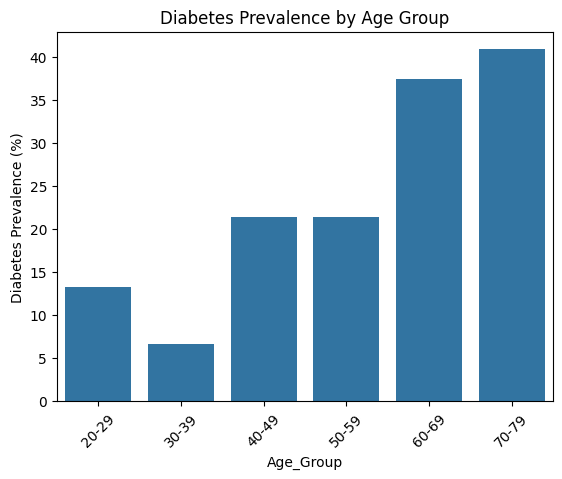

In [ ]:
# Creating Age Groups for Analysis

bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Diabetes Prevalence by Age Group
diabetes_by_age = df.groupby('Age_Group', observed=True)['Diabetes'].mean() * 100

sns.barplot(x=diabetes_by_age.index, y=diabetes_by_age.values)
plt.ylabel('Diabetes Prevalence (%)')
plt.title('Diabetes Prevalence by Age Group')
plt.xticks(rotation=45)
plt.show()


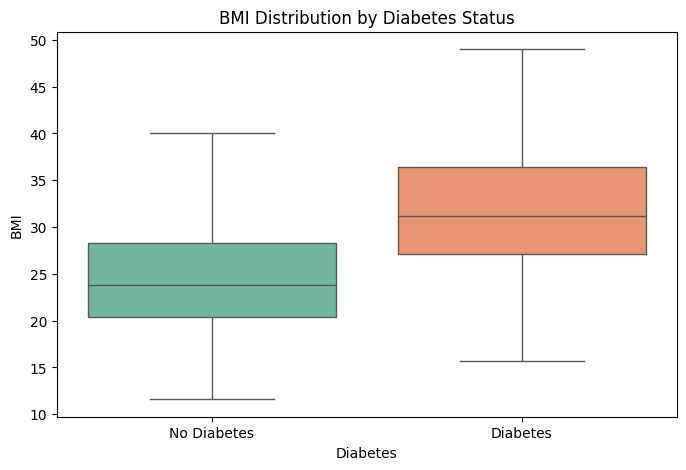

In [ ]:
# BMI Distribution Based on Diabetes Status
plt.figure(figsize=(8,5))
sns.boxplot(x='Diabetes', y='BMI', data=df, hue='Diabetes', palette=['#66c2a5', '#fc8d62'], dodge=False)
plt.title('BMI Distribution by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.legend([],[], frameon=False)  # Remove legend
plt.show()


                Systolic_BP  Diastolic_BP
Smoking_Status                           
Current          125.260870     85.260870
Former           124.520000     85.400000
Never            122.826923     78.461538


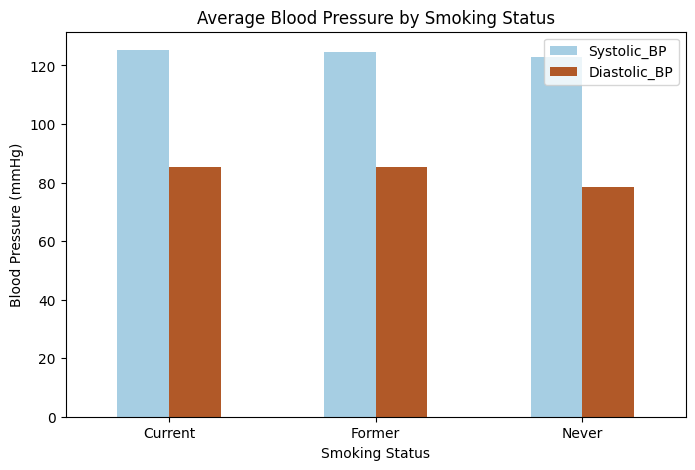

In [ ]:

#  Average Blood Pressure by Smoking Status
bp_by_smoking = df.groupby('Smoking_Status')[['Systolic_BP', 'Diastolic_BP']].mean()
print(bp_by_smoking)

# Plotting side-by-side bar plots for systolic and diastolic BP by smoking status
bp_by_smoking.plot(kind='bar', figsize=(8,5), colormap='Paired')
plt.title('Average Blood Pressure by Smoking Status')
plt.ylabel('Blood Pressure (mmHg)')
plt.xlabel('Smoking Status')
plt.xticks(rotation=0)
plt.show()


        Systolic_BP  Diastolic_BP
Gender                           
Female   124.386364     83.818182
Male     123.357143     80.142857


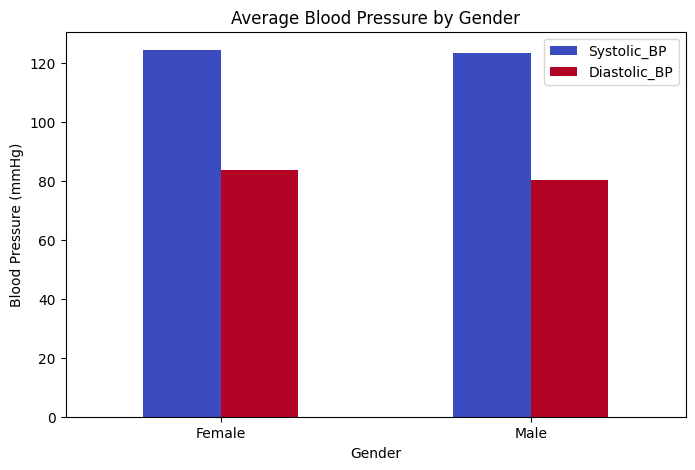

In [ ]:
# Average blood pressure by Gender
bp_by_gender = df.groupby('Gender')[['Systolic_BP', 'Diastolic_BP']].mean()
print(bp_by_gender)

# Plot average blood pressure by gender
bp_by_gender.plot(kind='bar', figsize=(8,5), colormap='coolwarm')
plt.title('Average Blood Pressure by Gender')
plt.ylabel('Blood Pressure (mmHg)')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Filtering Diabetic Patients with Elevated Blood Pressure
diabetic_patients = df[df['Diabetes'] == True]

# Identifying those with elevated BP
elevated_bp = diabetic_patients[
    (diabetic_patients['Systolic_BP'] >= 130) | (diabetic_patients['Diastolic_BP'] >= 80)
]

# Calculating the percentage
percent_elevated = (len(elevated_bp) / len(diabetic_patients)) * 100

print(f"Percentage of diabetic patients with elevated blood pressure: {percent_elevated:.2f}%")


Percentage of diabetic patients with elevated blood pressure: 88.89%
